In [1]:
import json

import numpy as np
from sklearn.ensemble import RandomForestClassifier

from experiments import Experiment, plot_experiment

In [2]:
def load_data(file_path = "experiments.json"):
    try:
        with open(file_path, "r") as f:
            return json.load(f)
    except FileNotFoundError:
        return []

def save_data(data_array, file_path = "experiments.json"):
    with open(file_path, "w") as f:
        json.dump(data_array, f, indent=4)

In [3]:
experiments = []

experiments.append(Experiment("amazon", k=5, t=2, desc="Amazon; k=5, t=2; vanilla RF"))
experiments.append(Experiment("microsoft", k=5, t=2, desc="Microsoft; k=5, t=2; vanilla RF"))
experiments.append(Experiment("amazon", denoise=False, k=5, t=2, desc="Raw amazon; k=5, t=2; vanilla RF"))
experiments.append(Experiment("microsoft", denoise=False, k=5, t=2, desc="Raw microsoft; k=5, t=2; vanilla RF"))
# experiments.append(Experiment("heartbeat", k=5, t=2, desc="Full heartbeat; k=5, t=2; vanilla RF"))

In [4]:
R = 120

r_list = np.arange(1, R + 1, 4).tolist()
print(r_list)

clf = RandomForestClassifier()

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117]


In [5]:
results = load_data()

for exp in experiments:
    print(exp.desc)
    
    metrics = exp.run(r_list, clf)
    results.append({"desc": exp.desc, "r_list": r_list, "metrics": metrics})

Amazon; k=5, t=2; vanilla RF
Scores extracted.
Microsoft; k=5, t=2; vanilla RF
Scores extracted.
Raw amazon; k=5, t=2; vanilla RF
Scores extracted.
Raw microsoft; k=5, t=2; vanilla RF
Scores extracted.


In [6]:
save_data(results)

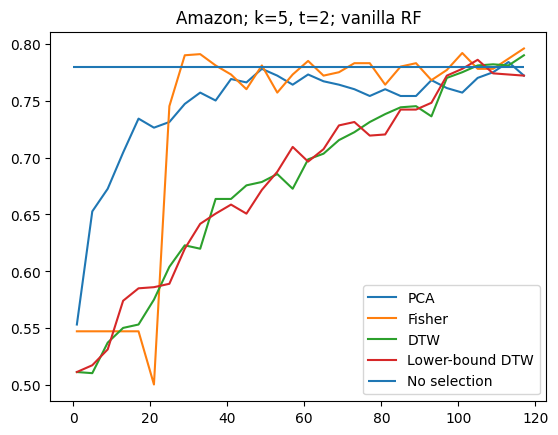

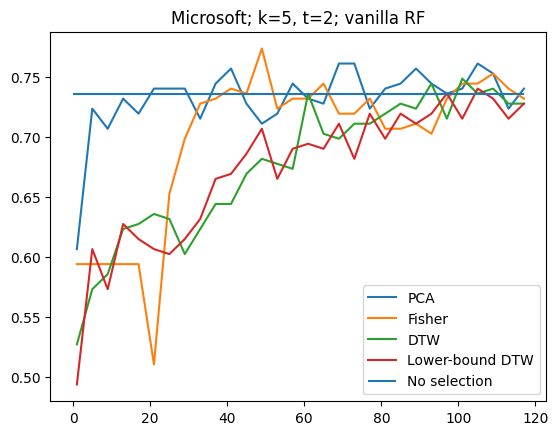

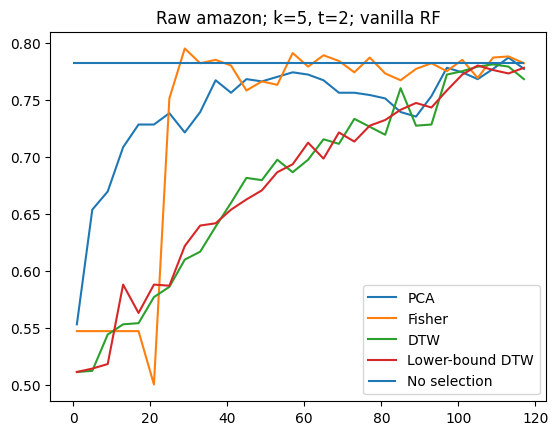

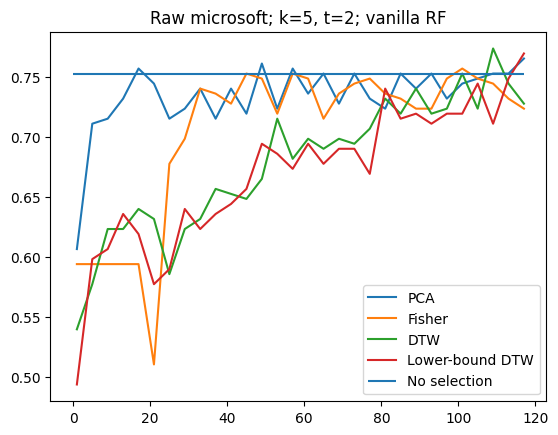

In [7]:
for exp in results:
    plot_experiment(exp)